# Project for Pacmann Probability Course

## Import Libraries

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
from math import factorial, sqrt
from functuser import *
from numerize.numerize import numerize
import scipy.stats as stats

## Import Data

In [2]:
insurance_data = pd.read_csv('./data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Descriptive Statistics Analysis

### Customer Segment by Age

In [3]:
# Mean
age_mean = insurance_data['age'].mean()
print_format(age_mean, 2)

39.21


### Smoker Age by Sex

In [4]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']

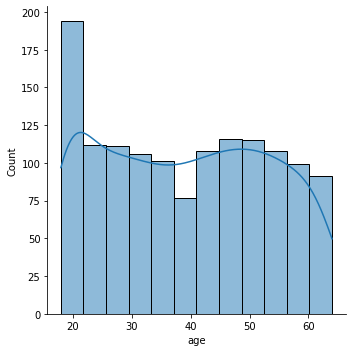

In [5]:
sns.displot(data=insurance_data, x='age', kde=True);

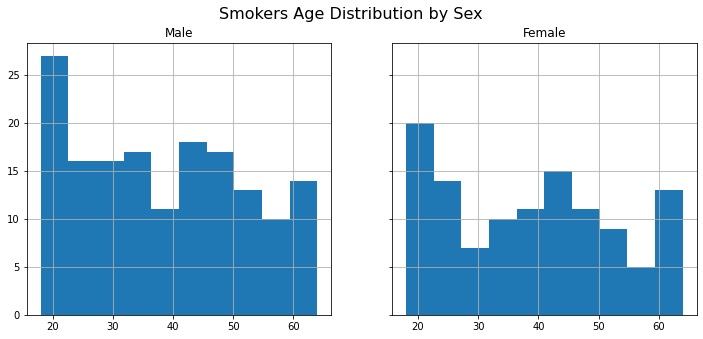

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True,sharex=True)
male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

ax1.hist(male_smoker['age'])
ax2.hist(female_smoker['age'])

ax1.grid(visible=True)
ax2.grid(visible=True)

ax1.set(title="Male")
ax2.set(title="Female")
plt.suptitle("Smokers Age Distribution by Sex", fontsize=16)
ax1.title.set_size(12)
ax2.title.set_size(12)

plt.show();

#### Male & Female

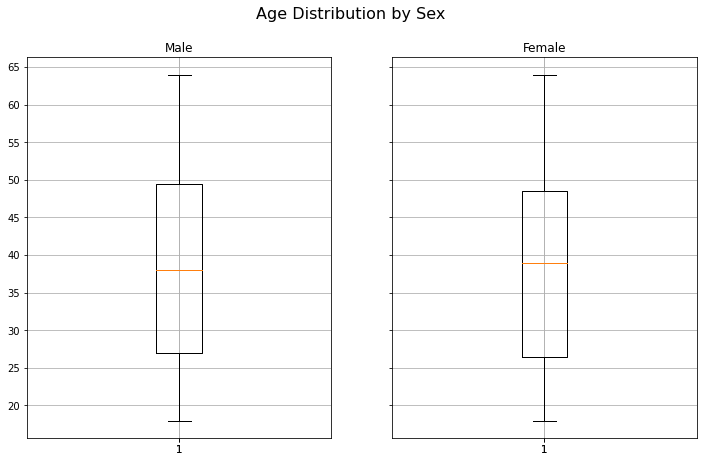

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)
male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

ax1.boxplot(male_smoker['age'])
ax2.boxplot(female_smoker['age'])

ax1.grid(visible=True)
ax2.grid(visible=True)

ax1.set(title="Male")
ax2.set(title="Female")
plt.suptitle("Age Distribution by Sex", fontsize=16)
ax1.title.set_size(12)
ax2.title.set_size(12)

tick_spacing = 5

ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### BMI

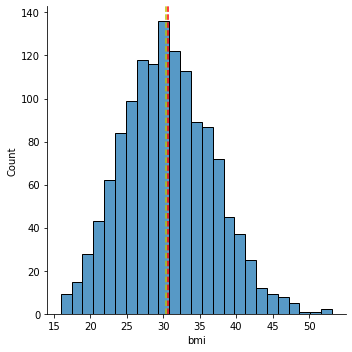

In [8]:
sns.displot(insurance_data.bmi)
plt.axvline(insurance_data.bmi.mean(),color='r', linestyle='--')
plt.axvline(insurance_data.bmi.median(),color='y', linestyle='--')
plt.show()

#### Smoker BMI Mean & Median & Mode 

In [9]:
smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
print_format(smokerBMI_mean, 3)

30.708


In [10]:
smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
print_format(smokerBMI_median, 3)

30.447


In [11]:
smokerBMI_mode = (
    insurance_data.loc[insurance_data['smoker'] == 'yes'])['bmi'].agg(pd.Series.mode)[0]

print_format(smokerBMI_mode, 3)

28.310


#### Non-smoker BMI Mean & Median & Mode

In [12]:
no_smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
print_format(no_smokerBMI_mean, 3)

30.652


In [13]:
no_smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
print_format(no_smokerBMI_median, 3)

30.352


In [14]:
smokerBMI_mode = (
    insurance_data.loc[insurance_data['smoker'] == 'no'])['bmi'].agg(pd.Series.mode)[0]

print_format(smokerBMI_mode, 3)

32.300


### Variance of Charges

### Smoker

In [15]:
smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'yes']
    ['charges']
    .var()
    )
print(numerize(smoker_charges_var))

133.21M


In [16]:
print(numerize(sqrt(smoker_charges_var)))

11.54K


#### Non-smoker Variance

In [17]:
# non smoker
non_smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'no']
    ['charges']
    .var()
)
print(numerize(non_smoker_charges_var))

35.93M


In [18]:
print(numerize(sqrt(non_smoker_charges_var)))

5.99K


### Charges by Sex, Smoker, and Age 

In [19]:
# male and female smoker are already present
male_no_smoker = insurance_data.loc[(insurance_data['smoker'] == 'no')&(insurance_data['sex'] == 'male')]
female_no_smoker = insurance_data.loc[(insurance_data['smoker'] == 'no')&(insurance_data['sex'] == 'female')]

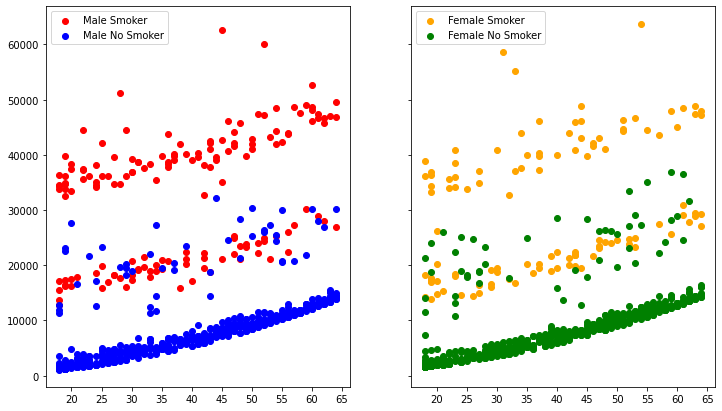

In [20]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

# cat: sex, dimension: age, charges
ax1.scatter(male_smoker['age'], male_smoker['charges'], c='red', label='Male Smoker')
ax2.scatter(female_smoker['age'], female_smoker['charges'], c='orange', label='Female Smoker')
ax1.scatter(male_no_smoker['age'], male_no_smoker['charges'], c='blue', label='Male No Smoker')
ax2.scatter(female_no_smoker['age'], female_no_smoker['charges'], c='green', label='Female No Smoker')

tick_spacing = 5

ax1.legend()
ax2.legend()

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### Charges by BMI and Sex for Age > 25

In [21]:
male_smoker_bmi25 = male_smoker.loc[male_smoker['bmi'] > 25]
male_no_smoker_bmi25 = male_no_smoker.loc[male_no_smoker['bmi'] > 25]
female_no_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]
female_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]

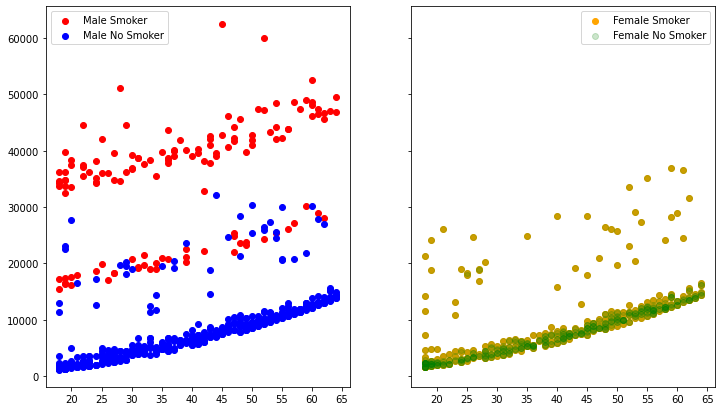

In [22]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

# cat: sex, dimension: age, charges
ax1.scatter(male_smoker_bmi25['age'], male_smoker_bmi25['charges'], c='red', label='Male Smoker')
ax2.scatter(female_smoker_bmi25['age'], female_smoker_bmi25['charges'], c='orange', label='Female Smoker')
ax1.scatter(male_no_smoker_bmi25['age'], male_no_smoker_bmi25['charges'], c='blue', label='Male No Smoker')
ax2.scatter(female_no_smoker_bmi25['age'], female_no_smoker_bmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)

tick_spacing = 5

ax1.legend()
ax2.legend()

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### Charges by BMI and Sex for Age < 25

In [23]:
male_smoker_lbmi25 = male_smoker.loc[male_smoker['bmi'] < 25]
male_no_smoker_lbmi25 = male_no_smoker.loc[male_no_smoker['bmi'] < 25]
female_no_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]
female_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]

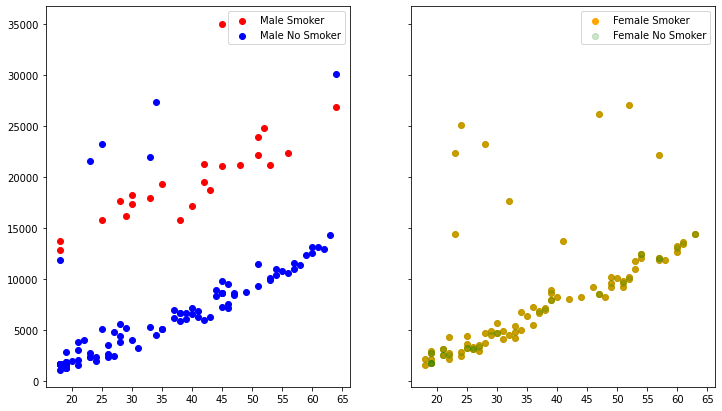

In [24]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

# cat: sex, dimension: age, charges
ax1.scatter(male_smoker_lbmi25['age'], male_smoker_lbmi25['charges'], c='red', label='Male Smoker')
ax2.scatter(female_smoker_lbmi25['age'], female_smoker_lbmi25['charges'], c='orange', label='Female Smoker')
ax1.scatter(male_no_smoker_lbmi25['age'], male_no_smoker_lbmi25['charges'], c='blue', label='Male No Smoker')
ax2.scatter(female_no_smoker_lbmi25['age'], female_no_smoker_lbmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)

tick_spacing = 5

ax1.legend()
ax2.legend()

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### Comparing BMI by Sex

In [25]:
male1 = insurance_data.loc[insurance_data['sex'] == 'male']
female1 = insurance_data.loc[insurance_data['sex'] == 'female']

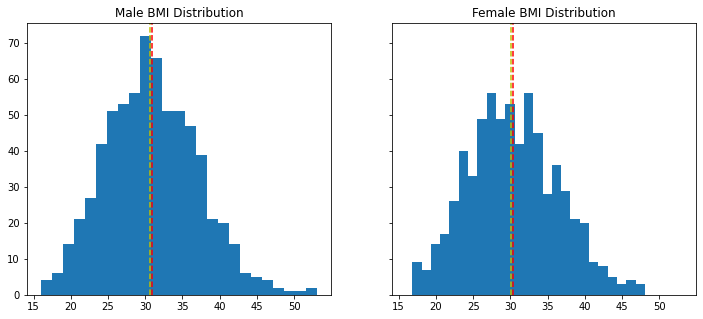

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax1.hist(male1['bmi'], bins=25)
ax1.axvline(male1['bmi'].mean(), c='r', linestyle='--', label='BMI of Male Mean')
ax1.axvline(male1['bmi'].median(), c='y', linestyle='--', label='BMI of Male Median')

ax2.hist(female1['bmi'], bins=25)
ax2.axvline(female1['bmi'].mean(), c='r', linestyle='--', label='BMI of Female Mean')
ax2.axvline(female1['bmi'].median(), c='y', linestyle='--', label='BMI of Female Median')

ax1.set(title='Male BMI Distribution')
ax2.set(title='Female BMI Distribution')

plt.show();

### Comparing BMI by Smoker Status

In [27]:
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

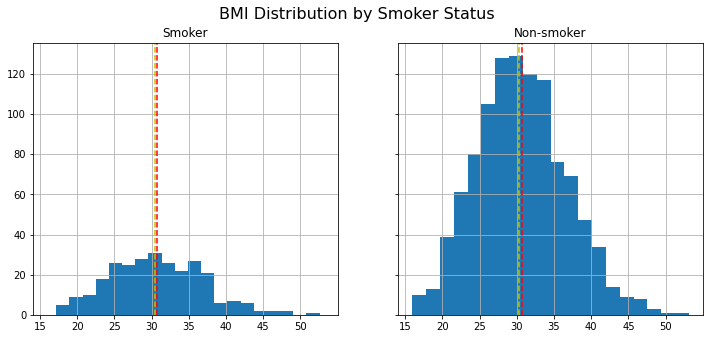

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True,sharex=True)
bmi_smoker = insurance_data[insurance_data['smoker'] == 'yes']  
bmi_no_smoker = insurance_data[insurance_data['smoker'] == 'no']

ax1.hist(bmi_smoker['bmi'], bins=20)
ax1.axvline(bmi_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Smoker Mean')
ax1.axvline(bmi_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Smoker Median')

ax2.hist(bmi_no_smoker['bmi'], bins=20)
ax2.axvline(bmi_no_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Non-smoker Mean')
ax2.axvline(bmi_no_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Non-smoker Median')

ax1.grid(visible=True)
ax2.grid(visible=True)

ax1.set(title="Smoker")
ax2.set(title="Non-smoker")
plt.suptitle("BMI Distribution by Smoker Status", fontsize=16)
ax1.title.set_size(12)
ax2.title.set_size(12)

plt.show();

## Categorical Variable Analysis (PMF)

#### Top Charges by Sex

In [29]:
top_charges_sex = insurance_data.groupby(['sex'])['charges'].max().reset_index()
top_charges_sex

,sex,charges
0,female,63770.42801
1,male,62592.87309


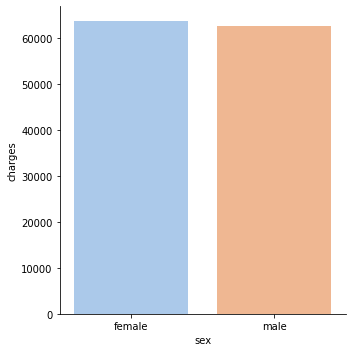

In [30]:
# plot
p = sns.catplot(data=top_charges_sex, x="sex", y="charges", palette="pastel", kind="bar")

plt.show();

#### Probability Distribution of Charges in Each Region 

In [31]:
# get charges by region
charges_region = insurance_data.groupby(['region'])['charges'].count().reset_index()
charges_region

,region,charges
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [32]:
# get probability for each region charges
charges_region['probability'] = charges_region['charges']/charges_region['charges'].sum() 
charges_region

,region,charges,probability
0,northeast,324,0.242152
1,northwest,325,0.242900
2,southeast,364,0.272048
3,southwest,325,0.242900


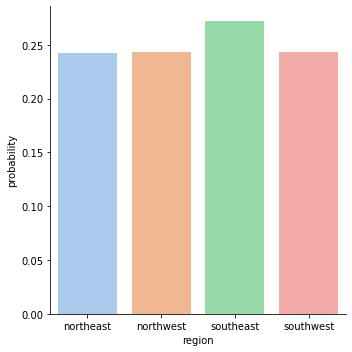

In [33]:
# plot
sns.catplot(data=charges_region, x="region", y="probability", palette="pastel", kind="bar")
plt.show();

#### Distribution of Smokers and Non Smokers in each Region

In [34]:
yn_smoker_region = pd.DataFrame(insurance_data.groupby(['region', 'smoker']).count()['charges'])
yn_smoker_region['percentage'] = (yn_smoker_region['charges']*100)/yn_smoker_region['charges'].sum()
yn_smoker_region

charges  percentage
region    smoker                     
northeast no          257   19.207773
          yes          67    5.007474
northwest no          267   19.955157
          yes          58    4.334828
southeast no          273   20.403587
          yes          91    6.801196
southwest no          267   19.955157
          yes          58    4.334828

#### Probability of a Smoker is a Female

In [35]:
prob_female = (insurance_data['sex'] == 'female')
prob_male = (insurance_data['sex'] == 'male')
prob_smoker = (insurance_data['smoker'] == 'yes')

In [36]:
female_given_smoker = conditional(prob_female, given=prob_smoker)
print_format(female_given_smoker, 2)

0.42


#### Probability of a Smoker is a Male

In [37]:
male_given_smoker = conditional(prob_male, given=prob_smoker)
print_format(male_given_smoker, 2)

0.58


#### Distribution of Charges in Each Region by Age

In [38]:
pd.DataFrame(insurance_data.groupby(['age', 'region']).mean()['charges'])

charges
age region                 
18  northeast   7558.732497
    southeast   6677.555986
19  northwest   9479.636524
    southeast  35570.314200
    southwest   7543.201624
...                     ...
63  southwest  25327.514667
64  northeast  14944.022862
    northwest  20971.302894
    southeast  26134.965188
    southwest  27669.870200

[185 rows x 1 columns]

In [39]:
southeast_charges = insurance_data.loc[insurance_data['region'] == 'southeast']
southwest_charges = insurance_data.loc[insurance_data['region'] == 'southwest']
northeast_charges = insurance_data.loc[insurance_data['region'] == 'northeast']
northwest_charges = insurance_data.loc[insurance_data['region'] == 'northwest']

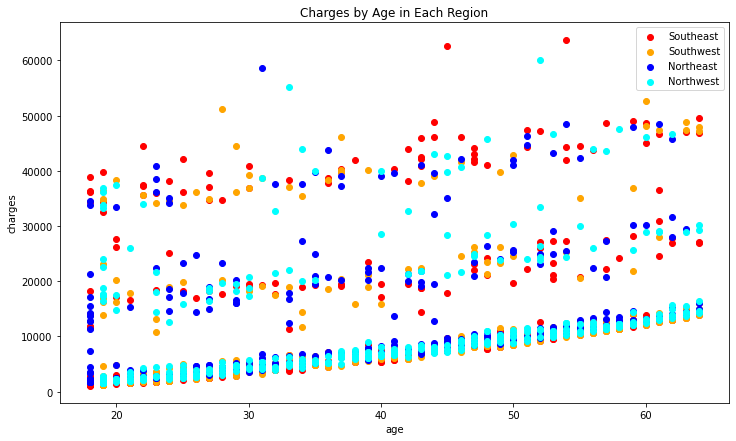

In [40]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(southeast_charges['age'], southeast_charges['charges'], c='red', label='Southeast')
ax.scatter(southwest_charges['age'], southwest_charges['charges'], c='orange', label='Southwest')
ax.scatter(northeast_charges['age'], northeast_charges['charges'], c='blue', label='Northeast')
ax.scatter(northwest_charges['age'], northwest_charges['charges'], c='cyan', label='Northwest')
ax.set(title='Charges by Age in Each Region', xlabel='age', ylabel='charges')

ax.legend()

plt.show();

### Continous Variable Analysis

#### Probability of Charge by BMI

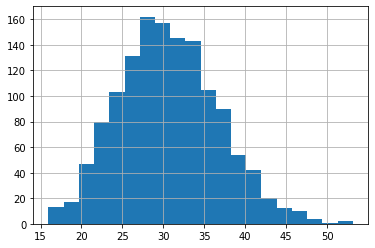

In [41]:
(insurance_data['bmi']).hist(bins=20);

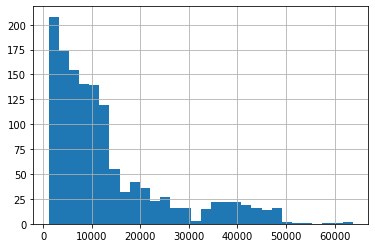

In [42]:
(insurance_data['charges']).hist(bins=30);

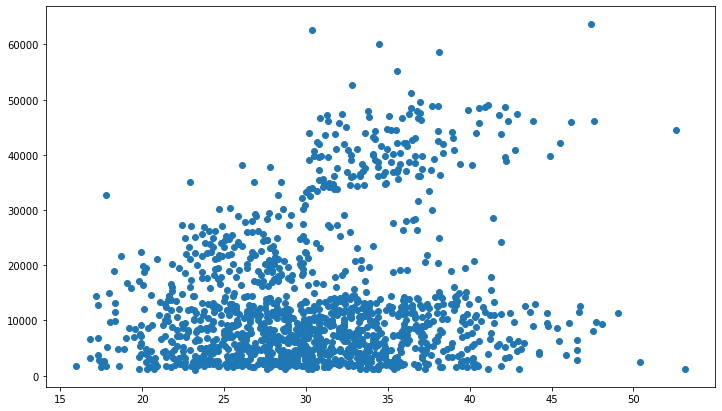

In [43]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(insurance_data['bmi'], insurance_data['charges'])
plt.show();

#### Probability of a Smoker with BMI > 25 Getting Charge > 16,7K

In [44]:
charge16_7 = (insurance_data['charges'] > 16_700)
bmi_m25 = (insurance_data['bmi'] > 25)

In [45]:
smoker_bmi_m25_get_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_m25))
print_format(smoker_bmi_m25_get_charge16_7, 3)

0.982


#### Probability of Random Person Getting Charge > 16,7K is a Smoker

In [46]:
charge16_7_is_smoker = conditional(charge16_7, given=prob_smoker)
print_format(charge16_7_is_smoker, 3)

0.927


#### COMPARING

#### Probability of a Person with BMI > 25 Getting Charge > 16,7K

In [47]:
bmi_m25_charge16_7 = conditional(charge16_7, given=bmi_m25)
print_format(bmi_m25_charge16_7, 3)

0.259


#### Probability of a Person with BMI < 25 Getting Charge > 16,7K

In [48]:
bmi_l25 = (insurance_data['bmi'] < 25)

In [49]:
bmi_l25_charge16_7 = conditional(charge16_7, given=bmi_l25)
print_format(bmi_l25_charge16_7, 3)

0.208


In [50]:
pd.DataFrame({
    'BMI > 25': bmi_m25_charge16_7,
    'BMI < 25': bmi_l25_charge16_7,
    
}, index = ['Charged > 16,7K'])

,BMI > 25,BMI < 25
"Charged > 16,7K",0.259395,0.208163


Person with BMI > 25 is slighly more likely to get charges > 16,7K

#### COMPARING

#### Probability of a Smoker with BMI > 25 Getting Charge > 16,7K

In [51]:
smokerBMI_m25_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_m25))
print_format(smokerBMI_m25_charge16_7, 3)

0.982


#### Probability of a Non-smoker with BMI > 25 Getting Charge > 16,7K

In [52]:
nonSmokerBMI_l25_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_l25))
print_format(nonSmokerBMI_l25_charge16_7, 3)

0.709


In [53]:
pd.DataFrame({
    'Smoker BMI > 25': smokerBMI_m25_charge16_7,
    'Non-smoker BMI > 25': nonSmokerBMI_l25_charge16_7,
    
}, index = ['Charged > 16,7K'])

,Smoker BMI > 25,Non-smoker BMI > 25
"Charged > 16,7K",0.981735,0.709091


A Smoker with BMI > 25 is more likely to get charged > 16,7K

### Variable Correlation Analysis

In [54]:
insurance_data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


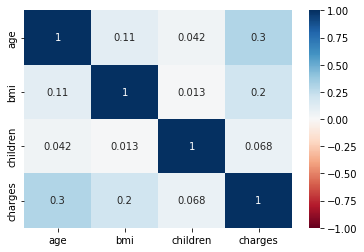

In [55]:
sns.heatmap(insurance_data.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True) 
plt.show();

#### Dummy

In [56]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
dummy_df = pd.get_dummies(data=insurance_data, columns=['sex', 'smoker', 'region', 'children'])
dummy_df

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,18,33.770,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,28,33.000,4449.46200,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,33,22.705,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,32,28.880,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1335,18,36.850,1629.83350,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1336,21,25.800,2007.94500,1,0,1,0,0,0,0,1,1,0,0,0,0,0


In [58]:
bmiM25 = []
for index, row in dummy_df.iterrows():
    if row.bmi > 25:
        bmiM25.append(1)
    elif row.bmi <= 25:
        bmiM25.append(0)

bmiL25 = []
for index1, row1 in dummy_df.iterrows():
    if row1.bmi < 25:
        bmiL25.append(1)
    elif row.bmi >= 25:
        bmiL25.append(0)

In [59]:
dummy_df['bmi_m25'] = pd.Series(bmiM25)
dummy_df['bmi_l25'] = pd.Series(bmiL25)
dummy_df.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,bmi_m25,bmi_l25
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
1,18,33.770,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
2,28,33.000,4449.46200,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,33,22.705,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,32,28.880,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0


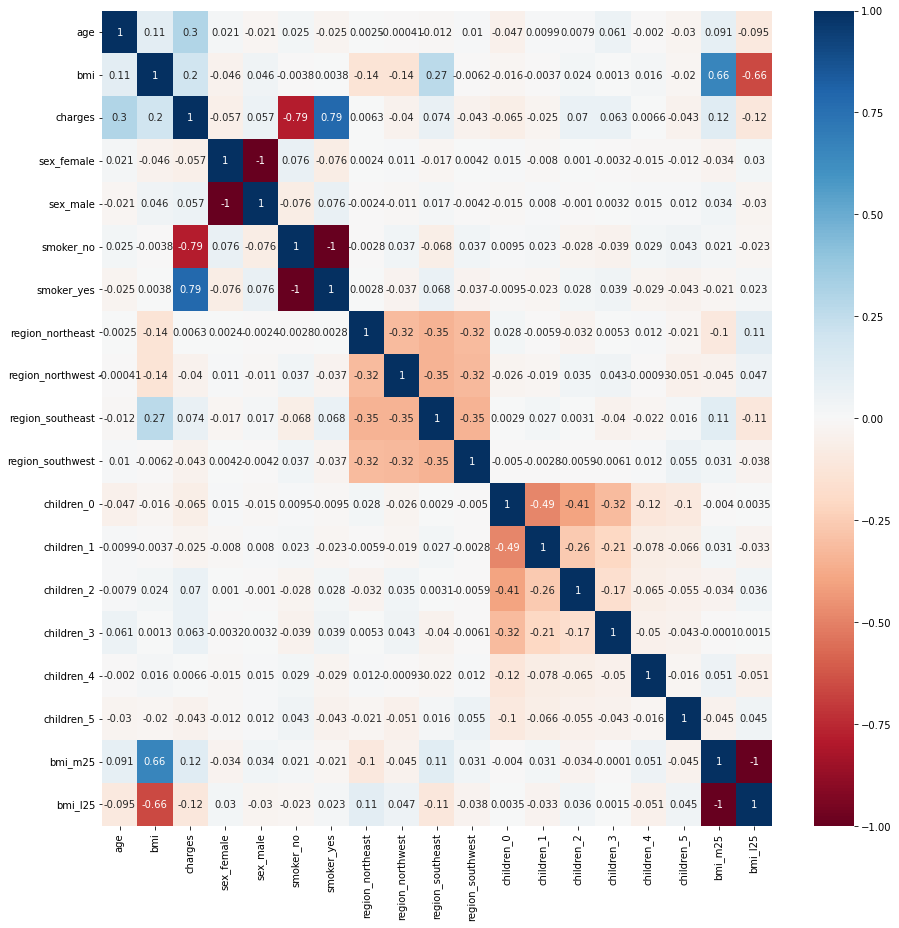

In [60]:
# plot correlation
plt.subplots(figsize=(15, 15))
sns.heatmap(dummy_df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True) 
plt.show();

In [61]:
# get columns with high correlation values
# correlation(dummy_df, 0.7)

Conclusion: Male smoker are likely to have higher rates of health charges. Non-smoker have negative correlation which means they are likely to have lower rates of health charges. BMI does not have a high correlation relationship with charges

### Hypothesis Testing

#### Hypothesis 1: Charges of smokers are higher compared to those who not

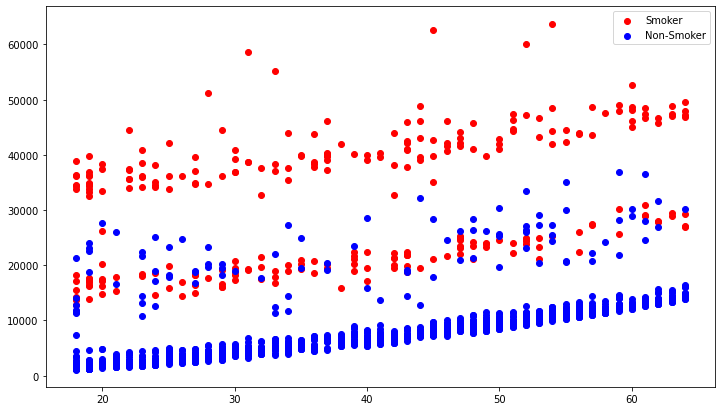

In [62]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(smoker['age'], smoker['charges'], label='Smoker', c='red')
ax.scatter(no_smoker['age'], no_smoker['charges'], label='Non-Smoker', c='blue')
ax.legend()

plt.show();

In [63]:
# T-test
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(insurance_data[insurance_data.smoker == 'yes'].charges) 
y = np.array(insurance_data[insurance_data.smoker == 'no'].charges)

# independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)

Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.
p-value: 0.00000000


Conclusion: Smokers pay higher charges compared to non-smokers

#### Hypothesis 2: Charges of those with BMI > 25 are higher than those with BMI < 25

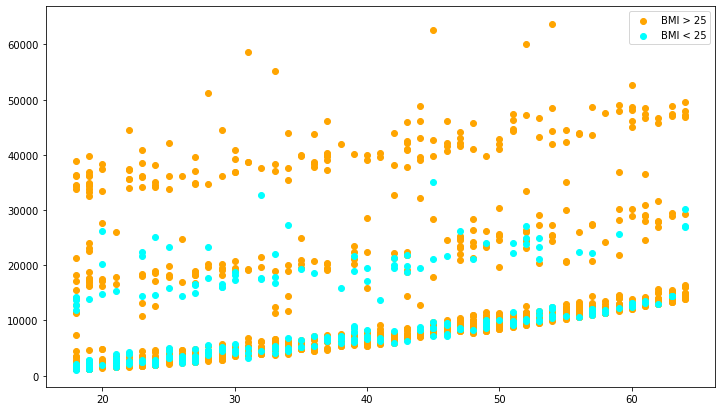

In [64]:
fig, ax = plt.subplots(figsize=(12, 7))
hypo2_bmi_m25 = (insurance_data[bmi_m25])
hypo2_bmi_l25 = (insurance_data[bmi_l25])

ax.scatter(hypo2_bmi_m25['age'], hypo2_bmi_m25['charges'], label='BMI > 25', c='orange')
ax.scatter(hypo2_bmi_l25['age'], hypo2_bmi_l25['charges'], label='BMI < 25', c='cyan')
ax.legend()

plt.show();

In [65]:
Ho_2 = "Charges of those with BMI > 25 and BMI < 25 are the same"   
Ha_2 = "Charges of those with BMI > 25 and BMI < 25 are not the same"

x = np.array(dummy_df[dummy_df.bmi_m25 == 1].charges) 
y = np.array(dummy_df[dummy_df.bmi_l25 == 1].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)

Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.
p-value: 0.00001792


Conclusion: Those with BMI > 25 pay higher than those with BMI > 25

#### Hypothesis 3: Male and Female BMI's does not differ significantly

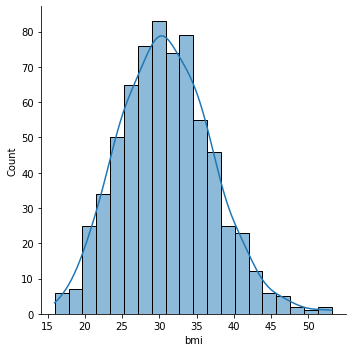

In [66]:
sns.displot(male1['bmi'], kde=True);

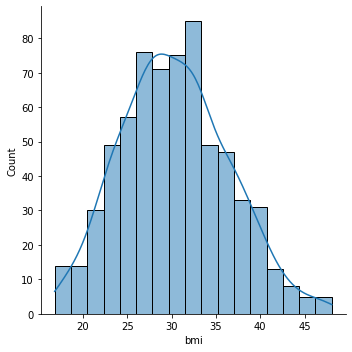

In [67]:
sns.displot(female1['bmi'], kde=True);

In [68]:
Ho_3 = "BMI of Male and Female does not differ significantly"   
Ha_3 = "BMI of Male and Female does differ significantly"

x = np.array(insurance_data[insurance_data.sex == 'male'].bmi) 
y = np.array(insurance_data[insurance_data.sex == 'female'].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)

Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.
p-value: 0.08997637


Conclusion: BMI does not differ significantly between male and female